0.6419721993126376
('Linear Prediction', array([[6.83387374]]))
('Logarthimic Prediction', array([[6.57295696]]))


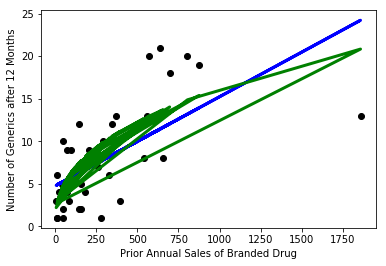

"\ngeneric.sort_values(by='GenPrice', inplace=True)\nprint(generic.head())\n\n#linear regression\nlin_reg3 = LinearRegression().fit(a, b)\nlin_pred3 = lin_reg3.predict(a)\nprint('Linear Prediction', lin_reg3.predict( np.array([ [50] ]) ))\n\n#linear regression with logged data\nlog_reg3 = LinearRegression().fit(np.log(a), np.log(b))\nlog_pred3 = e ** log_reg3.predict(np.log(a))\nprint('Logarithmic Prediction', e ** log_reg3.predict( np.array([ [np.log(50)] ]) ))\n\nplt.scatter(a, b, color='black')\nplt.plot(a, lin_pred3, color='orange', linewidth=3)\nplt.plot(a, e ** (log_reg3.coef_ * a), color='aqua', linewidth=3)\nplt.xlabel('Ratio of Generic Price to Branded Price')\nplt.ylabel('Generic Share of Market')\nplt.show()\n"

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from math import e
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression

#read data
generic = pd.read_csv('data/generic-data.csv')
generic = pd.DataFrame({'Class': generic['Class'], 'Marketer': generic['Marketer'],'BrandedLaunch': generic['Branded Launch'],'GenericLaunch': generic['Generic Launch'], 'PriorAnnualSales': generic['Market size: Annual branded sales prior to generic entry (in year 2000 $ millions)'], 'NumGen': generic['Number Generics 12 Months after Generic Entry'], 'GenPrice': generic['Generic Price 12 Months after Generic Entry to Branded Price Pre-Entry'], 'GenShare': generic['Generic Share 12 Months after Generic Entry'], 'RestrictedUse': generic['Restricted use']})
#get rid of all commas and %
generic.replace(',','', regex=True, inplace=True)
generic.replace('%','', regex=True, inplace=True)
#convert to int
generic['PriorAnnualSales'] = generic['PriorAnnualSales'].astype(int)
generic['NumGen'] = generic['NumGen'].astype(int)
generic['GenPrice'] = generic['GenPrice'].astype(int)
generic['GenShare'] = generic['GenShare'].astype(int)

#g = sns.PairGrid(generic)
#g.map(sns.scatterplot)

#Prior annual sales
X = generic.values[:, 7:8].astype(int)
#Number of generics
y = generic.values[:, 6:7].astype(int)
#Ratio of generic price to branded price
y2 = generic.values[:, 2:3].astype(int)
#Ratio of generic price to branded price
a = generic.values[:, 2:3].astype(int)
#Generic share of market
b = generic.values[:, 3:4].astype(int)

#1a: predicting number of generics based on prior annual sales
''''''
generic.sort_values(by='PriorAnnualSales', inplace=True)
print(generic['PriorAnnualSales'].corr(generic['NumGen'])) #0.64 is pretty good

#linear regression
lin_reg = LinearRegression().fit(X, y)
lin_pred = lin_reg.predict(X)
print('Linear Prediction', lin_reg.predict( np.array([ [200] ]) ))

#linear regression with logged data
log_reg = LinearRegression().fit(np.log(X), np.log(y))
print('Logarthimic Prediction', e ** log_reg.predict( np.array([ [np.log(200)] ]) ))

#making a scatterplot of the testing data, drawing the training data's line with the testing data
plt.scatter(X, y,  color='black')
#linear regression
plt.plot(X, lin_pred, color='blue', linewidth=3)
#unlogged plot
plt.plot(X, e ** (log_reg.coef_ * np.log(X)), color='green', linewidth=3)
plt.xlabel('Prior Annual Sales of Branded Drug')
plt.ylabel('Number of Generics after 12 Months')
plt.show()


#1b: predicting ratio of generic price to branded price based on prior annual sales
'''
generic.sort_values(by='PriorAnnualSales', inplace=True)

#linear regression
lin_reg2 = LinearRegression().fit(X, y2)
lin_pred2 = lin_reg2.predict(X)
print('Linear Prediction', lin_reg2.predict( np.array([ [1200] ]) ))

#linear regression of logged data
log_reg2 = LinearRegression().fit(np.log(X), np.log(y2))
log_pred2 = e ** log_reg2.predict(np.log(X))
print('Logarthimic Prediction', e ** log_reg2.predict( np.array([ [np.log(1200)] ]) ))

plt.scatter(X, y2, color='black')
plt.plot(X, lin_pred2, color='pink', linewidth=3)
plt.plot(X, log_pred2, color='purple', linewidth=3)
plt.xlabel('Prior Annual Sales of Branded Drug')
plt.ylabel('Ratio of Generic Price to Branded Price')
plt.show()
'''

#for fun
'''
generic.sort_values(by='GenPrice', inplace=True)
print(generic.head())

#linear regression
lin_reg3 = LinearRegression().fit(a, b)
lin_pred3 = lin_reg3.predict(a)
print('Linear Prediction', lin_reg3.predict( np.array([ [50] ]) ))

#linear regression with logged data
log_reg3 = LinearRegression().fit(np.log(a), np.log(b))
log_pred3 = e ** log_reg3.predict(np.log(a))
print('Logarithmic Prediction', e ** log_reg3.predict( np.array([ [np.log(50)] ]) ))

plt.scatter(a, b, color='black')
plt.plot(a, lin_pred3, color='orange', linewidth=3)
plt.plot(a, e ** (log_reg3.coef_ * a), color='aqua', linewidth=3)
plt.xlabel('Ratio of Generic Price to Branded Price')
plt.ylabel('Generic Share of Market')
plt.show()
'''